In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("/kaggle/input/public-transport-usage-dataset/public_transport_usage_dataset.csv")
print(data.head)

<bound method NDFrame.head of           ID Category        Date  Passenger Count  Average Travel Time (min)  \
0       ID_1   Type D  2018-01-01              786                     381.88   
1       ID_2   Type C  2018-01-02              136                     356.26   
2       ID_3   Type C  2018-01-03              571                     446.18   
3       ID_4   Type D  2018-01-04              167                     298.15   
4       ID_5   Type B  2018-01-05              835                     213.52   
..       ...      ...         ...              ...                        ...   
995   ID_996   Type C  2020-09-22              616                     468.52   
996   ID_997   Type D  2020-09-23              425                     312.30   
997   ID_998   Type B  2020-09-24              571                     359.80   
998   ID_999   Type D  2020-09-25              710                     468.49   
999  ID_1000   Type C  2020-09-26              720                     119.91  

In [10]:
print(data.info())
print(data.isnull().sum())
print(data.describe())
print("Unique Categories:",data['Category'].unique())
print("Unique labels:",data['Label'].unique())
print("Average Passenger:",data['Passenger Count'].mean())
print("Total Passenger Count:",data['Passenger Count'].sum())
print("Highest value:",data['Passenger Count'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1000 non-null   object 
 1   Category                   1000 non-null   object 
 2   Date                       1000 non-null   object 
 3   Passenger Count            1000 non-null   int64  
 4   Average Travel Time (min)  1000 non-null   float64
 5   Label                      1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB
None
ID                           0
Category                     0
Date                         0
Passenger Count              0
Average Travel Time (min)    0
Label                        0
dtype: int64
       Passenger Count  Average Travel Time (min)
count      1000.000000                1000.000000
mean        497.458000                 253.937590
std         290.533719        

In [11]:
data = data.dropna()
data['Date'] = pd.to_datetime(data['Date'])
data = data.drop_duplicates()
print(data.dtypes)
print(data.isnull().sum())

ID                                   object
Category                             object
Date                         datetime64[ns]
Passenger Count                       int64
Average Travel Time (min)           float64
Label                                object
dtype: object
ID                           0
Category                     0
Date                         0
Passenger Count              0
Average Travel Time (min)    0
Label                        0
dtype: int64


In [25]:
total_passengers = data.groupby('Category')['Passenger Count'].sum()
print(total_passengers)
total_passengers = data.groupby('Category')['Passenger Count'].mean()
print(total_passengers)
total_passengers = data.groupby('Category')['Passenger Count'].min()
print(total_passengers)
total_passengers = data.groupby('Category')['Passenger Count'].max()
print(total_passengers)
average_Lavel = data.groupby('Label')['Passenger Count'].mean()
print(average_Lavel)
max_Lavel = data.groupby('Label')['Passenger Count'].max()
print(max_Lavel)
min_Lavel = data.groupby('Label')['Passenger Count'].min()
print(min_Lavel)

Category
Type A    122784
Type B    130156
Type C    120605
Type D    123913
Name: Passenger Count, dtype: int64
Category
Type A    507.371901
Type B    498.681992
Type C    500.435685
Type D    484.035156
Name: Passenger Count, dtype: float64
Category
Type A    2
Type B    8
Type C    5
Type D    5
Name: Passenger Count, dtype: int64
Category
Type A    991
Type B    999
Type C    994
Type D    998
Name: Passenger Count, dtype: int64
Label
Negative    513.974212
Neutral     505.842271
Positive    472.242515
Name: Passenger Count, dtype: float64
Label
Negative    998
Neutral     995
Positive    999
Name: Passenger Count, dtype: int64
Label
Negative    2
Neutral     5
Positive    5
Name: Passenger Count, dtype: int64


In [13]:
total_passenger = data.groupby('Category')['Passenger Count'].sum()
print(total_passenger)
average_passenger = data.groupby('Category')['Passenger Count'].mean()
print(average_passenger)
max_passenger = data.groupby('Category')['Passenger Count'].max()
print(max_passenger)
min_passenger = data.groupby('Category')['Passenger Count'].min()
print(min_passenger)
total_category=("Unique Categories:",data['Category'].unique())
print(total_category)
data['Month'] =data['Date'].dt.month
monthly_trends = data.groupby('Month')['Passenger Count'].sum()
print(monthly_trends)
monthly_trends = data.groupby('Month')['Passenger Count'].mean()
print(monthly_trends)
monthly_trends = data.groupby('Month')['Passenger Count'].max()
print(monthly_trends)
monthly_trends = data.groupby('Month')['Passenger Count'].min()
print(monthly_trends)

Category
Type A    122784
Type B    130156
Type C    120605
Type D    123913
Name: Passenger Count, dtype: int64
Category
Type A    507.371901
Type B    498.681992
Type C    500.435685
Type D    484.035156
Name: Passenger Count, dtype: float64
Category
Type A    991
Type B    999
Type C    994
Type D    998
Name: Passenger Count, dtype: int64
Category
Type A    2
Type B    8
Type C    5
Type D    5
Name: Passenger Count, dtype: int64
('Unique Categories:', array(['Type D', 'Type C', 'Type B', 'Type A'], dtype=object))
Month
1     47756
2     41170
3     43324
4     45483
5     49574
6     46310
7     43120
8     46400
9     45109
10    27548
11    29452
12    32212
Name: Passenger Count, dtype: int64
Month
1     513.505376
2     484.352941
3     465.849462
4     505.366667
5     533.053763
6     514.555556
7     463.655914
8     498.924731
9     524.523256
10    444.322581
11    490.866667
12    519.548387
Name: Passenger Count, dtype: float64
Month
1     994
2     999
3     946
4     

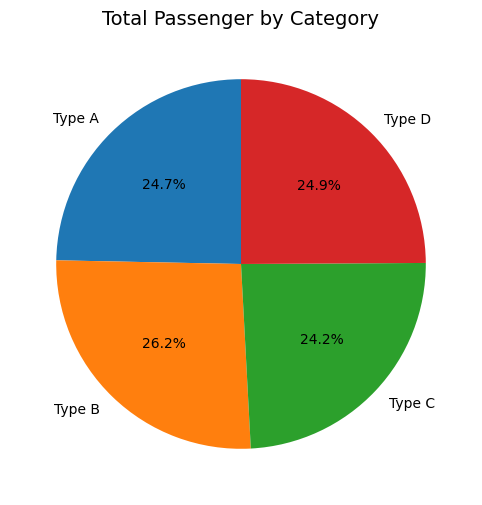

In [14]:
#visualization
plt.figure(figsize=(8,6))
plt.pie(total_passenger.values, labels=total_passenger.index,autopct= '%1.1f%%', startangle=90)
plt.title("Total Passenger by Category", fontsize=14)
plt.show()

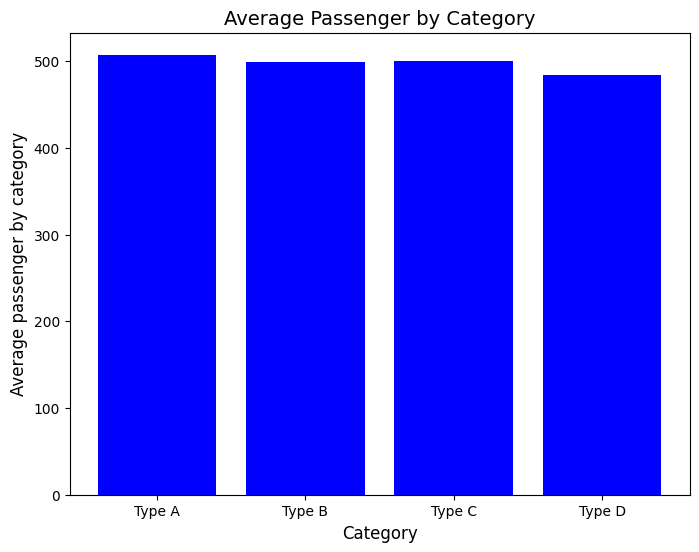

In [17]:
plt.figure(figsize=(8,6))
plt.bar(average_passenger.index,average_passenger.values, color='blue')
plt.title("Average Passenger by Category",fontsize=14)
plt.xlabel("Category",fontsize=12)
plt.ylabel("Average passenger by category",fontsize=12)
plt.show()

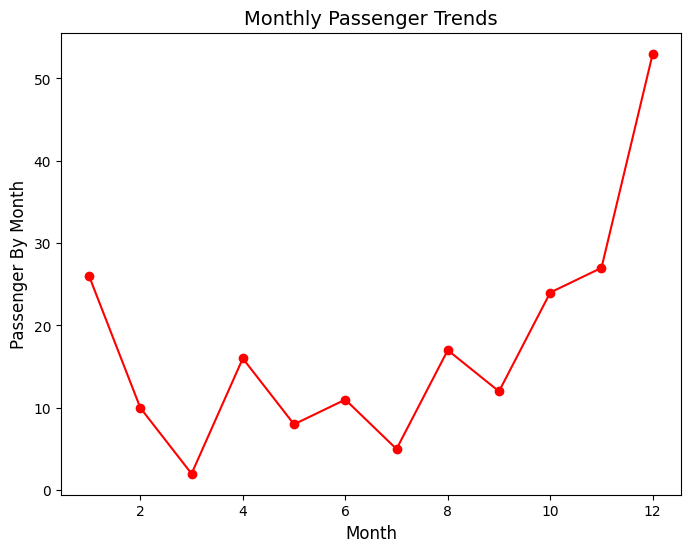

In [21]:
plt.figure(figsize=(8,6))
plt.plot(monthly_trends.index,monthly_trends.values,marker='o',color='red')
plt.title("Monthly Passenger Trends",fontsize=14)
plt.xlabel("Month",fontsize=12)
plt.ylabel("Passenger By Month",fontsize=12)
plt.show()


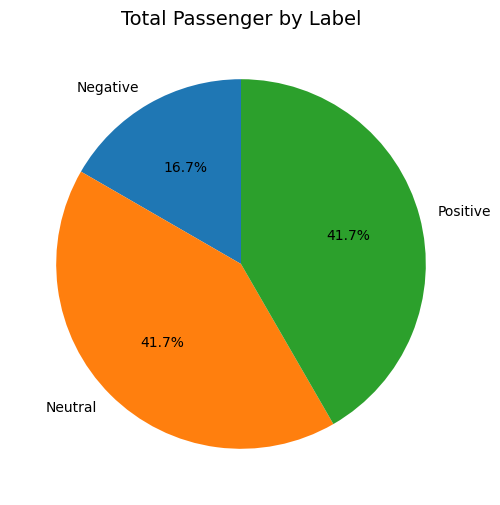

In [22]:
plt.figure(figsize=(8,6))
plt.pie(total_Lavel.values, labels=total_Lavel.index,autopct= '%1.1f%%', startangle=90)
plt.title("Total Passenger by Label", fontsize=14)
plt.show()

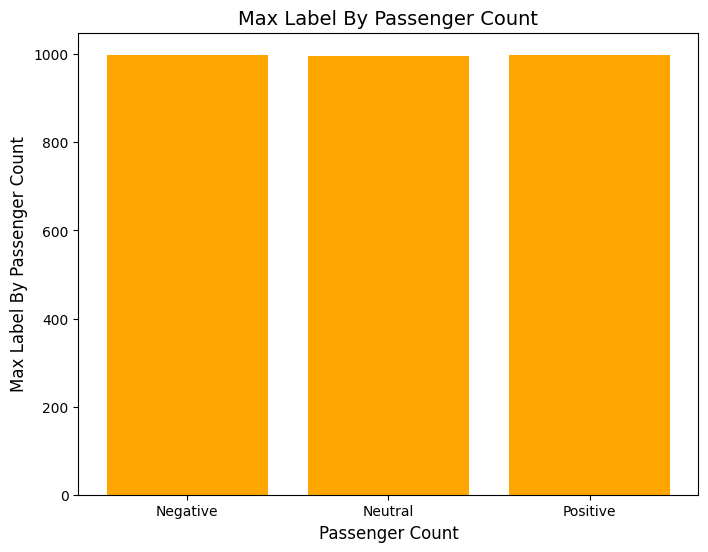

In [24]:
plt.figure(figsize=(8,6))
plt.bar(max_Lavel.index,max_Lavel.values, color='orange')
plt.title("Max Label By Passenger Count",fontsize=14)
plt.xlabel("Passenger Count",fontsize=12)
plt.ylabel("Max Label By Passenger Count",fontsize=12)
plt.show()

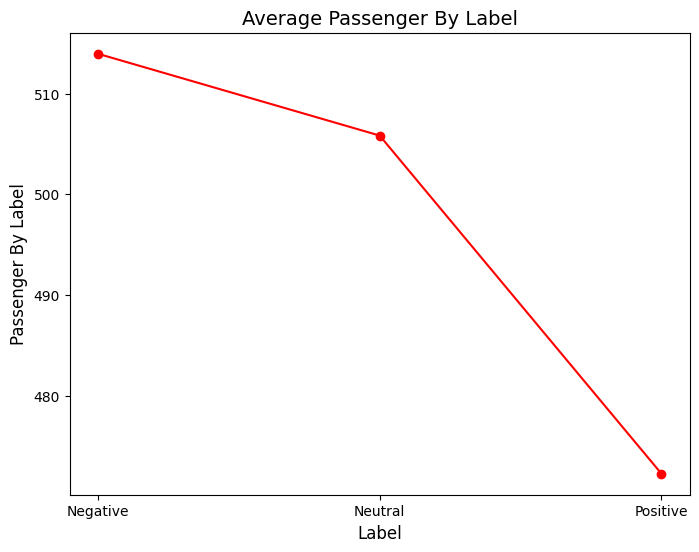

In [26]:
plt.figure(figsize=(8,6))
plt.plot(average_Lavel.index,average_Lavel.values,marker='o',color='red')
plt.title("Average Passenger By Label",fontsize=14)
plt.xlabel("Label",fontsize=12)
plt.ylabel("Passenger By Label",fontsize=12)
plt.show()